# Лабораторная работа №5

### Используемые библиотеки

In [97]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.decomposition import PCA
import random
import math

### Исходные данные:
[`iris.data`](https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data)

## Загрузка данных

In [98]:
data = pd.read_csv('iris.data', header=None).drop(4, axis=1)
data

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [99]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

KMeans(n_clusters=3, n_init=15)

In [100]:
k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)
print(f'Cluster centers: {k_means_cluster_centers}\nCluster labels: {k_means_labels}')

Cluster centers: [[5.9016129  2.7483871  4.39354839 1.43387097]
 [5.006      3.418      1.464      0.244     ]
 [6.85       3.07368421 5.74210526 2.07105263]]
Cluster labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]


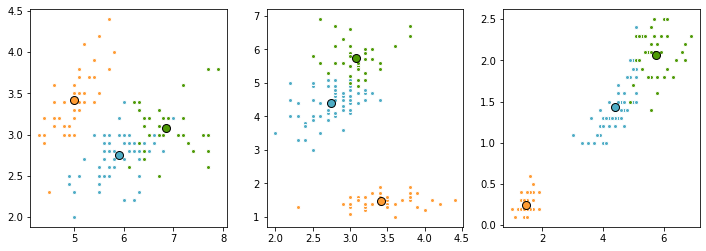

In [101]:
def plot_kmeans(k_means, data, title=''):
    f, ax = plt.subplots(1, 3, figsize=(12, 4))
    f.suptitle(title)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']
    for i in range(3):
        my_members = k_means.labels_ == i
        cluster_center = k_means.cluster_centers_[i]
        for j in range(3):
            ax[j].plot(data[my_members][j], data[my_members][j+1], 'w', markerfacecolor=colors[i], marker='o', markersize=4, lw=0)
            ax[j].plot(cluster_center[j], cluster_center[j+1], 'o', markerfacecolor=colors[i], markeredgecolor='k', markersize=8)
    plt.show()
plot_kmeans(k_means, data)

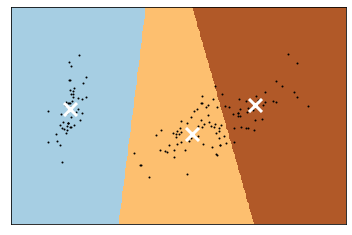

In [102]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)

kmeans = KMeans(init='k-means++', n_clusters=3)
kmeans.fit(reduced_data)
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = .02     # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

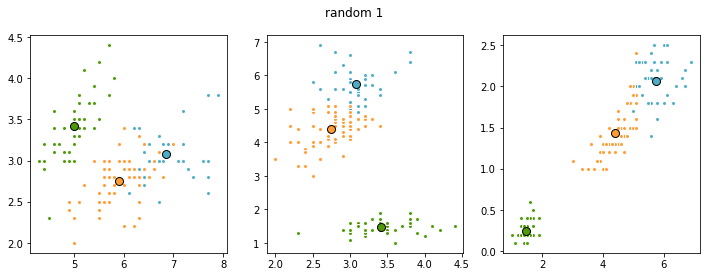

In [103]:
k_means = KMeans(init='random', n_clusters=3).fit(data)
plot_kmeans(k_means, data, 'random 1')

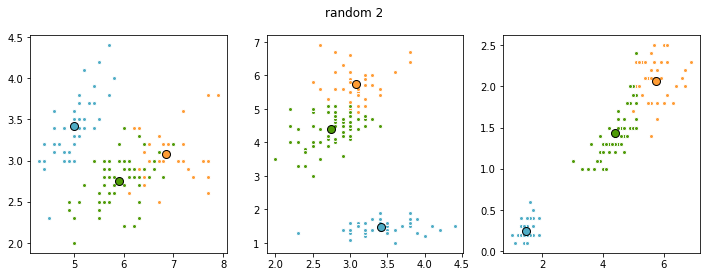

In [104]:
k_means = KMeans(init='random', n_clusters=3).fit(data)
plot_kmeans(k_means, data, 'random 2')

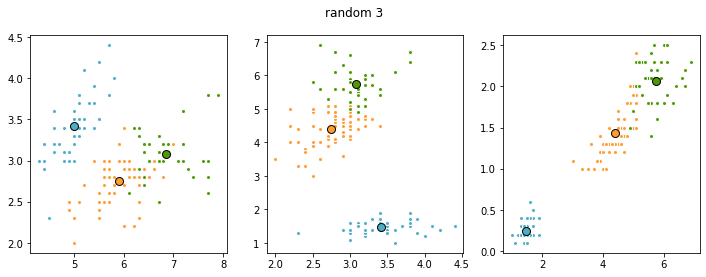

In [105]:
k_means = KMeans(init='random', n_clusters=3).fit(data)
plot_kmeans(k_means, data, 'random 3')

/home/milty/Documents/current/sem7/ML-lab5/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


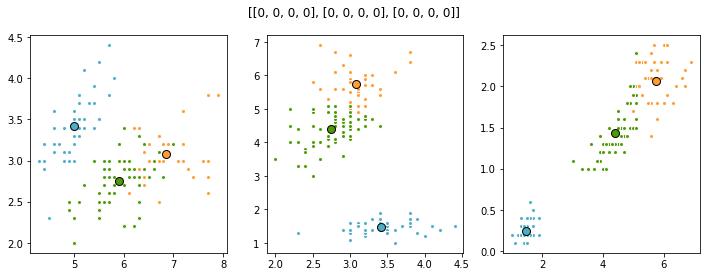

In [106]:
k_means = KMeans(init=np.array([[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]), n_clusters=3).fit(data)
plot_kmeans(k_means, data, '[[0, 0, 0, 0], [0, 0, 0, 0], [0, 0, 0, 0]]')

/home/milty/Documents/current/sem7/ML-lab5/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


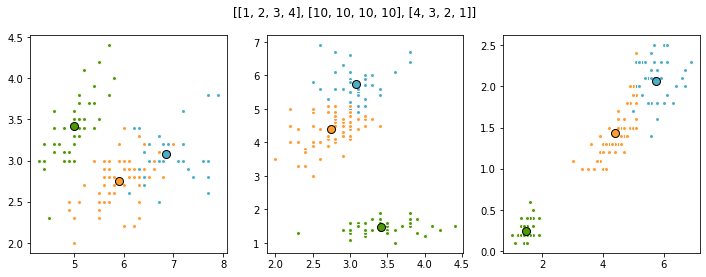

In [107]:
k_means = KMeans(init=np.array([[1, 2, 3, 4], [10, 10, 10, 10], [4, 3, 2, 1]]), n_clusters=3).fit(data)
plot_kmeans(k_means, data, '[[1, 2, 3, 4], [10, 10, 10, 10], [4, 3, 2, 1]]')

/home/milty/Documents/current/sem7/ML-lab5/venv/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1149: RuntimeWarning: Explicit initial center position passed: performing only one init in KMeans instead of n_init=10.
  self._check_params(X)


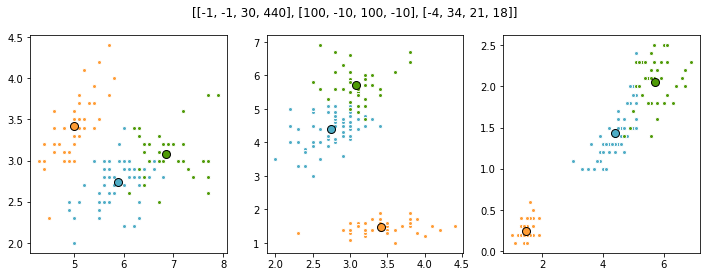

In [108]:
k_means = KMeans(init=np.array([[-1, -1, 30, 440], [100, -10, 100, -10], [-4, 34, 21, 18]]), n_clusters=3).fit(data)
plot_kmeans(k_means, data, '[[-1, -1, 30, 440], [100, -10, 100, -10], [-4, 34, 21, 18]]')

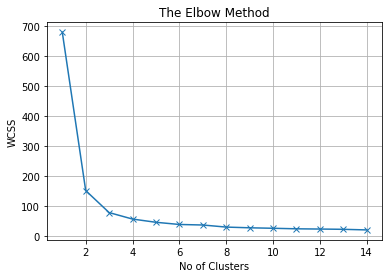

In [109]:
wcss=[]
for i in range(1,15):
    kmean = KMeans(n_clusters=i, init='random')
    kmean.fit_predict(data)
    wcss.append(kmean.inertia_)

plt.plot(range(1,15), wcss, marker='x')
plt.title('The Elbow Method')
plt.xlabel("No of Clusters")
plt.ylabel("WCSS")
plt.grid()

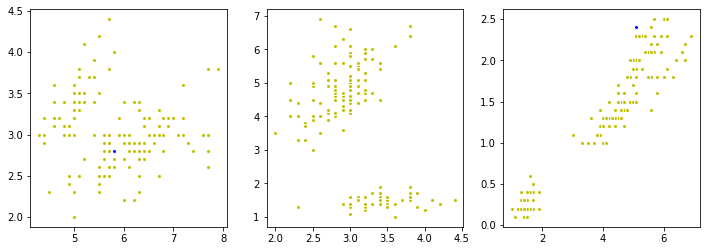

In [110]:
batch_km = MiniBatchKMeans(n_clusters=3, batch_size=10, n_init=1)
batch_km.fit(data)

km = KMeans(n_clusters=3, n_init=1)
km.fit(data)

diffs = list(map(lambda x: x[0] == x[1], zip(batch_km.labels_, km.labels_)))
f, ax = plt.subplots(1, 3, figsize=(12, 4))
for j in range(3):
    for i in range(len(data)):
        ax[j].plot(data[j][i], data[j+1][i], 'w', markerfacecolor='b' if diffs[i] else 'y', marker='o', markersize=4, lw=0)

## Иерархическая кластеризация

In [111]:
hier = AgglomerativeClustering(n_clusters=5, linkage='average')
hier.fit(data)
hier_labels = hier.labels_
pd.DataFrame(hier_labels)

,0
0,0
1,0
2,0
3,0
4,0
...,...
145,4
146,2
147,4
148,4


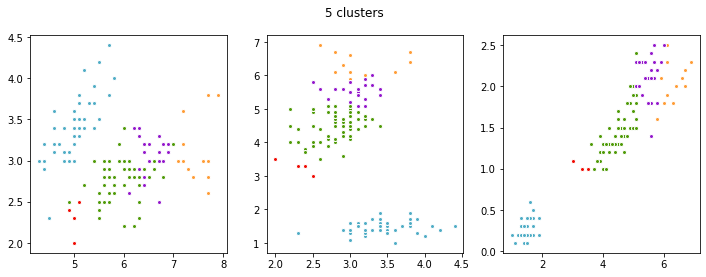

In [112]:
def plot_agglomerative(agglomerative, data, title=''):
    f, ax = plt.subplots(1, 3, figsize=(12, 4))
    f.suptitle(title)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06', '#F00800', '#9215CB']
    for i in range(5):
        my_members = agglomerative == i
        for j in range(3):
            ax[j].plot(data[my_members][j], data[my_members][j+1], 'w', markerfacecolor=colors[i], marker='o', markersize=4, lw=0)
plot_agglomerative(hier_labels, data, '5 clusters')

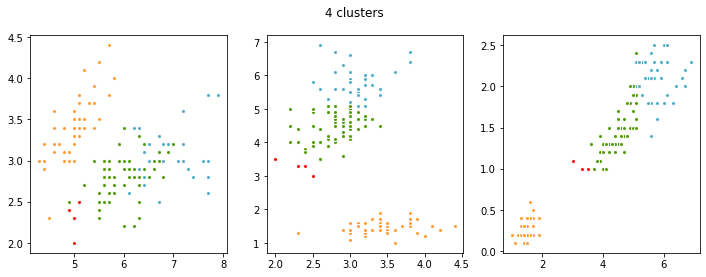

In [113]:
plot_agglomerative(AgglomerativeClustering(n_clusters=4, linkage='average').fit(data).labels_, data, '4 clusters')

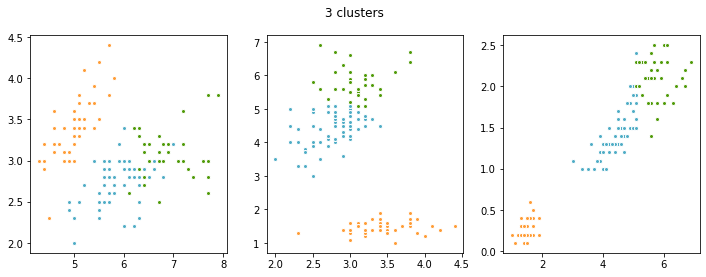

In [114]:
plot_agglomerative(AgglomerativeClustering(n_clusters=3, linkage='average').fit(data).labels_, data, '3 clusters')

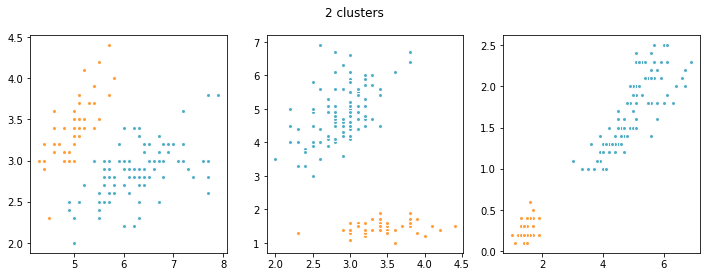

In [115]:
plot_agglomerative(AgglomerativeClustering(n_clusters=2, linkage='average').fit(data).labels_, data, '2 clusters')

In [116]:
def plot_dendrogram(model, title='', x_label='', **kwargs):
    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count
    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)
    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    plt.xlabel(x_label)
    plt.title(title)

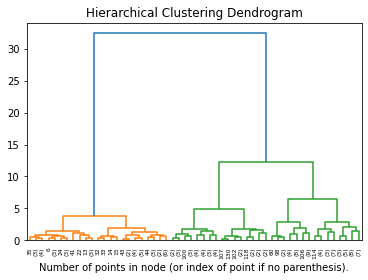

In [117]:
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(data)
plot_dendrogram(model, truncate_mode='level', p=5, title='Hierarchical Clustering Dendrogram', x_label="Number of points in node (or index of point if no parenthesis).")

In [124]:
data1 = np.zeros([250,2])
for i in range(250):
    r = random.uniform(1, 3)
    a = random.uniform(0, 2 * math.pi)
    data1[i,0] = r * math.sin(a)
    data1[i,1] = r * math.cos(a)
data2 = np.zeros([500,2])
for i in range(500):
    r = random.uniform(5, 9)
    a = random.uniform(0, 2 * math.pi)
    data2[i,0] = r * math.sin(a)
    data2[i,1] = r * math.cos(a)
data = np.vstack((data1, data2))
pd.DataFrame(data)

,0,1
0,-0.412435,1.141679
1,-1.909739,1.453252
2,0.081176,-2.470887
3,-0.797607,1.391538
4,-0.753081,2.743172
...,...,...
745,6.153241,6.074050
746,4.855301,-2.247338
747,7.186191,-3.520148
748,-5.990834,5.782149


In [125]:
hier = AgglomerativeClustering(n_clusters=2, linkage='single')
hier = hier.fit(data)
hier_labels = hier.labels_

/tmp/ipykernel_15539/1834705327.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='red',linestyle='None')
/tmp/ipykernel_15539/1834705327.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='blue',linestyle='None')


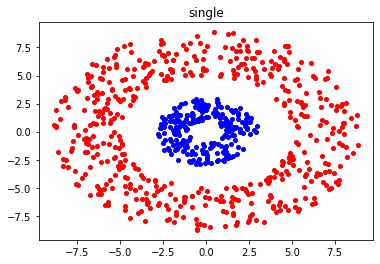

In [126]:
def plot_clusters(clusters, data, title=''):
    my_members = clusters == 0
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='red',linestyle='None')
    my_members = clusters == 1
    plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='blue',linestyle='None')
    plt.title(title)
plot_clusters(hier_labels, data, 'single')

/tmp/ipykernel_15539/1834705327.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='red',linestyle='None')
/tmp/ipykernel_15539/1834705327.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='blue',linestyle='None')


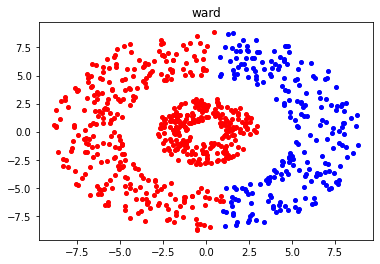

In [127]:
hier_labels = AgglomerativeClustering(n_clusters=2, linkage='ward').fit(data).labels_
plot_clusters(hier_labels, data, 'ward')

/tmp/ipykernel_15539/1834705327.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='red',linestyle='None')
/tmp/ipykernel_15539/1834705327.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='blue',linestyle='None')


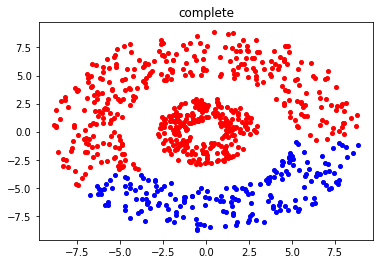

In [128]:
hier_labels = AgglomerativeClustering(n_clusters=2, linkage='complete').fit(data).labels_
plot_clusters(hier_labels, data, 'complete')

/tmp/ipykernel_15539/1834705327.py:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='red',linestyle='None')
/tmp/ipykernel_15539/1834705327.py:5: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "w" (-> color=(1.0, 1.0, 1.0, 1)). The keyword argument will take precedence.
  plt.plot(data[my_members, 0], data[my_members, 1], 'w', marker='o', markersize=4, color='blue',linestyle='None')


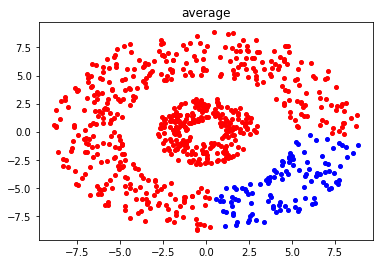

In [129]:
hier_labels = AgglomerativeClustering(n_clusters=2, linkage='average').fit(data).labels_
plot_clusters(hier_labels, data, 'average')